<a href="https://colab.research.google.com/github/linjiw/787/blob/main/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW8-linjiw

## preparation 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd /content/drive/MyDrive/24787/hw8

/content/drive/MyDrive/24787/hw8


In [4]:
% ls

alpha_shape.csv  data_b.txt  hw8.ipynb
data_a.txt       data_c.txt  MLAI24787_hw08_2022Spring.pdf


# Q1

## load data

In [ ]:
alpha_shape = np.genfromtxt("alpha_shape.csv",delimiter=",")[1:,:]

In [ ]:
x = alpha_shape[:,0]
y = alpha_shape[:,1]
z = alpha_shape[:,2]

In [ ]:
lst = [x,y,z]
for i in lst:
  print(f"shape {i.shape}")

shape (120,)
shape (120,)
shape (120,)


## a) centroid

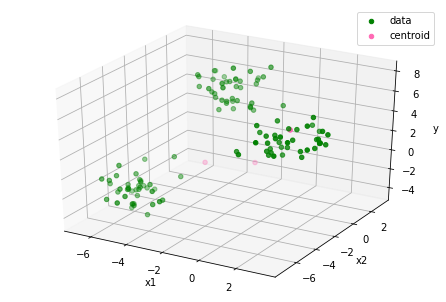

In [ ]:
raw_rand = np.random.rand(3,3)

range_3 = np.array([np.max(alpha_shape,axis=0)-np.min(alpha_shape,axis=0)])

low_3 = np.array([np.min(alpha_shape,axis=0)])
# constraint_mat = 
centroid = raw_rand*range_3+low_3

def showresult(data,cent):
  # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  fig = plt.figure()

  ax = Axes3D(fig)
  ax.scatter(alpha_shape[:,0].reshape(-1,1),alpha_shape[:,1].reshape(-1,1),alpha_shape[:,2].reshape(-1,1),label="data",color="green")
  ax.scatter(cent[:,0].reshape(-1,1),cent[:,1].reshape(-1,1),cent[:,2].reshape(-1,1),label="centroid",color = 'hotpink')
  ax.legend()
  # cbar =fig.colorbar(surf, shrink=0.5, aspect=5)
  # cbar.ax.set_ylabel('predition surface', rotation=270)
  ax.set(xlabel='x1',ylabel="x2",zlabel="y")
  plt.show()
  # return centroid

showresult(alpha_shape,centroid)

## b) k-means

### 1)

In [ ]:
def kmeans(k=3,data=alpha_shape,init=centroid,iter=10):
  centro = init
  for j in range(iter):
    distance_to_each_cen = []
    for i in range(k):
      distance_to_each_cen.append((np.sum((data-centro[i,:])**2,axis=1)))
    distance_to_each_cen = np.array(distance_to_each_cen)
    # print(f"distance_to_each_cen {distance_to_each_cen.shape}")
    cluster = np.argmin(distance_to_each_cen,axis=0)
    # print(f"cluster {cluster.shape}")
    centro = []
    for i in range(k):
      centro.append(np.mean(data[cluster==i],axis=0))
    centro = np.array(centro)
    # print(centro.shape)



  new_data = np.hstack((data,cluster.reshape(-1,1)))
  # print(f"new_data {new_data.shape}")
  return new_data, centro
  # print(new_data)
k =3
new_data,centro  = kmeans(k=k,data=alpha_shape,init=centroid,iter=100)
# showresult(alpha_shape,centro)


In [ ]:
for i in range(k):
  print(f"{i}: {centro[i]}")
print(f"labels:\n{new_data[:,3]}")

0: [-5.32056873 -4.91565431 -2.07455069]
1: [ 1.58614169 -2.16739026  3.62546335]
2: [-3.18814754  0.94220378  5.52755187]
labels:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


### 2)

In [ ]:
def showrcluster(data,cent):
  # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  fig = plt.figure()

  ax = Axes3D(fig)
  ax.scatter(data[:,0].reshape(-1,1),data[:,1].reshape(-1,1),data[:,2].reshape(-1,1),c=data[:,3].reshape(-1,1),label="data")
  ax.scatter(cent[:,0].reshape(-1,1),cent[:,1].reshape(-1,1),cent[:,2].reshape(-1,1),label="centroid",color = 'red',s=80)
  ax.legend()
  # cbar =fig.colorbar(surf, shrink=0.5, aspect=5)
  # cbar.ax.set_ylabel('predition surface', rotation=270)
  ax.set(xlabel='x1',ylabel="x2",zlabel="y")
  plt.show()

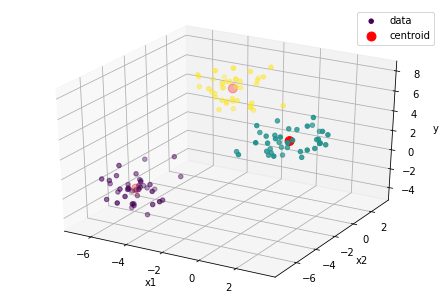

In [ ]:
showrcluster(new_data,centro)

### c) decision boundaries

#### x = mean(X)

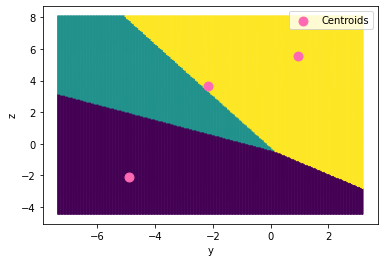

In [ ]:
def showrbound(data,cent):
  
  k = 3
  num_grid = 200
  x_range = np.linspace(x.min(), x.max(), num_grid, endpoint=True)
  y_range = np.linspace(y.min(), y.max(), num_grid, endpoint=True)
  z_range = np.linspace(z.min(), z.max(), num_grid, endpoint=True)
  
  x_mean = np.mean(x)
  
  yy, zz = np.meshgrid(y_range, z_range)
  new_data = np.zeros((num_grid**2,3))
  # new_data[:,0] = 
  new_x = np.ones((len(yy.ravel()))) * x_mean
  new_data[:,0] = new_x
  new_data[:,1] = yy.ravel()
  new_data[:,2] = zz.ravel()
  # cluster_id = np.empty((100, 100))
  distance_to_each_cen = []
  
  for i in range(k):
      distance_to_each_cen.append((np.sum((new_data-centro[i,:])**2,axis=1)))
  distance_to_each_cen = np.array(distance_to_each_cen)
  # print(f"distance_to_each_cen {distance_to_each_cen.shape}")
  cluster = np.argmin(distance_to_each_cen,axis=0)
  # print(f"cluster {cluster.shape}")
  # for i in range(100):
  #     for j in range(100):
  #         dist = np.sum([(xMean-Centroids[0,:])**2, (yy[i,j]-Centroids[1,:])**2, (zz[i,j]-Centroids[2,:])**2], axis=0)
  #         cluster_id[i, j] = np.argmin(dist)

  # for k in range(K):
  #     plt.scatter(yy[cluster_id==k], zz[cluster_id==k], c=color[k], label=labels[k])
  plt.scatter(yy.ravel(), zz.ravel(), s=1, c=cluster)
  plt.scatter(cent[:,1], cent[:,2], s=80, c="hotpink", label='Centroids')
  plt.xlabel("y")
  plt.ylabel("z")
  plt.legend()
  plt.show()
showrbound(alpha_shape,centro)

#### y = mean(Y)

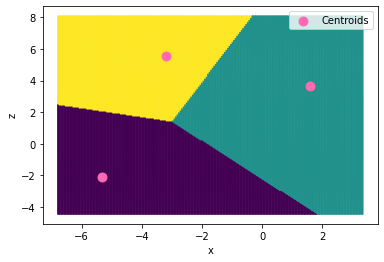

In [ ]:
def showrbound(data,cent):
  
  k = 3
  num_grid = 200
  x_range = np.linspace(x.min(), x.max(), num_grid, endpoint=True)
  y_range = np.linspace(y.min(), y.max(), num_grid, endpoint=True)
  z_range = np.linspace(z.min(), z.max(), num_grid, endpoint=True)
  
  y_mean = np.mean(y)
  
  xx, zz = np.meshgrid(x_range, z_range)
  new_data = np.zeros((num_grid**2,3))
  # new_data[:,0] = 
  new_y = np.ones((len(xx.ravel()))) * y_mean
  new_data[:,0] = xx.ravel()
  new_data[:,1] = new_y
  new_data[:,2] = zz.ravel()
  # cluster_id = np.empty((100, 100))
  distance_to_each_cen = []
  
  for i in range(k):
      distance_to_each_cen.append((np.sum((new_data-centro[i,:])**2,axis=1)))
  distance_to_each_cen = np.array(distance_to_each_cen)
  # print(f"distance_to_each_cen {distance_to_each_cen.shape}")
  cluster = np.argmin(distance_to_each_cen,axis=0)
  # print(f"cluster {cluster.shape}")
  # for i in range(100):
  #     for j in range(100):
  #         dist = np.sum([(xMean-Centroids[0,:])**2, (yy[i,j]-Centroids[1,:])**2, (zz[i,j]-Centroids[2,:])**2], axis=0)
  #         cluster_id[i, j] = np.argmin(dist)

  # for k in range(K):
  #     plt.scatter(yy[cluster_id==k], zz[cluster_id==k], c=color[k], label=labels[k])
  plt.scatter(xx.ravel(), zz.ravel(), s=1, c=cluster)
  plt.scatter(cent[:,0], cent[:,2], s=80, c="hotpink", label='Centroids')
  plt.xlabel("x")
  plt.ylabel("z")
  plt.legend()
  plt.show()
showrbound(alpha_shape,centro)

#### z = mean(Z)

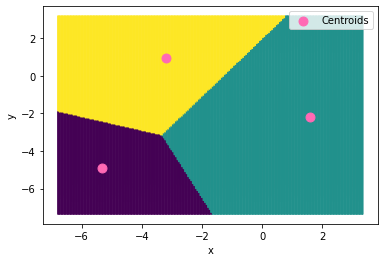

In [ ]:
def showrbound(data,cent):
  
  k = 3
  num_grid = 200
  x_range = np.linspace(x.min(), x.max(), num_grid, endpoint=True)
  y_range = np.linspace(y.min(), y.max(), num_grid, endpoint=True)
  z_range = np.linspace(z.min(), z.max(), num_grid, endpoint=True)
  
  z_mean = np.mean(z)
  
  xx, yy = np.meshgrid(x_range, y_range)
  new_data = np.zeros((num_grid**2,3))
  # new_data[:,0] = 
  new_z = np.ones((len(xx.ravel()))) * z_mean
  new_data[:,0] = xx.ravel()
  new_data[:,1] = yy.ravel()
  new_data[:,2] = new_z
  # cluster_id = np.empty((100, 100))
  distance_to_each_cen = []
  
  for i in range(k):
      distance_to_each_cen.append((np.sum((new_data-centro[i,:])**2,axis=1)))
  distance_to_each_cen = np.array(distance_to_each_cen)
  # print(f"distance_to_each_cen {distance_to_each_cen.shape}")
  cluster = np.argmin(distance_to_each_cen,axis=0)
  # print(f"cluster {cluster.shape}")
  # for i in range(100):
  #     for j in range(100):
  #         dist = np.sum([(xMean-Centroids[0,:])**2, (yy[i,j]-Centroids[1,:])**2, (zz[i,j]-Centroids[2,:])**2], axis=0)
  #         cluster_id[i, j] = np.argmin(dist)

  # for k in range(K):
  #     plt.scatter(yy[cluster_id==k], zz[cluster_id==k], c=color[k], label=labels[k])
  plt.scatter(xx.ravel(), yy.ravel(), s=1, c=cluster)
  plt.scatter(cent[:,0], cent[:,1], s=80, c="hotpink", label='Centroids')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()
showrbound(alpha_shape,centro)

### d) Sklearn

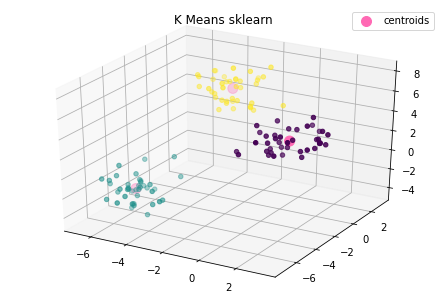

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(alpha_shape)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x, y, z, c=labels)
ax.scatter3D(centroid[:,0], centroid[:,1], centroid[:,2], s=100,c='hotpink',label='centroids')
plt.legend()
plt.title('K Means sklearn')
plt.show()

### e) Sklearn

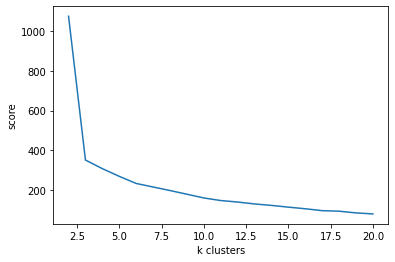

In [ ]:
scores = []
clusters = []
plt.figure()
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(alpha_shape)
    score = -kmeans.score(alpha_shape)
    scores.append(score)
    clusters.append(i+1)
plt.xlabel('k clusters')
plt.ylabel('score')
plt.plot(clusters, scores)
plt.show()

### Discussion


Given the score graph, 3 clusters could bring the performance to about 75%. Since large cluster number will increase computation time, we can choose 5 as the upper bound since it has around 80% performance.

#Q2

In [8]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

## a)

In [31]:
# Read data
data_a = np.genfromtxt("data_a.txt", delimiter=" ")
data_b = np.genfromtxt("data_b.txt", delimiter=" ")
data_c = np.genfromtxt("data_c.txt", delimiter=" ")

In [32]:
print(f"data_a {data_a.shape}")

data_a (2000, 2)


In [47]:
print((np.exp(-data_a[0]-data_a[1])**2/(0.7**2)))

[1.01626179e-01 3.34281646e+02]


In [57]:
def L_mat(data, sigma):
  m = len(data)
  A = np.zeros((m, m))
  for i in range(m):
      for j in range(m):
          A[i, j] = np.exp(-np.linalg.norm(data[i]-data[j])**2/sigma**2)

  D  = np.diag((np.sum(A, axis=0))**(-0.5))
  
  M = D @ A @ D


  L  = np.eye(len(A)) - M
  return L



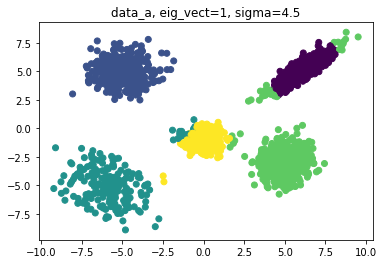

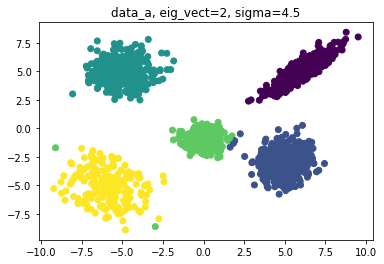

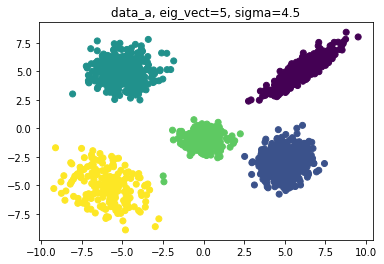

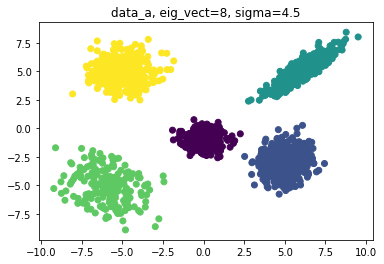

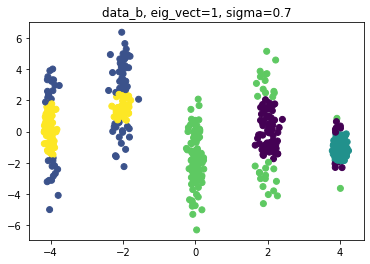

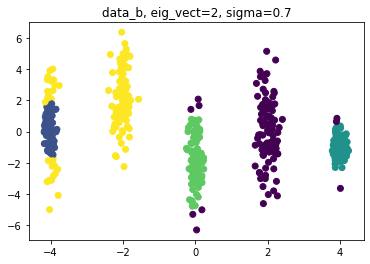

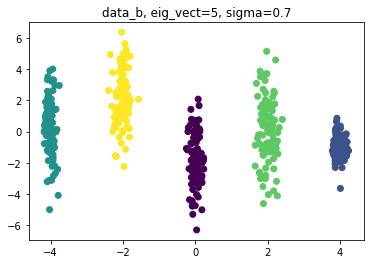

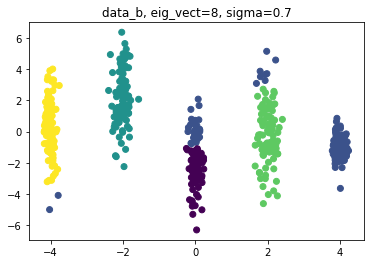

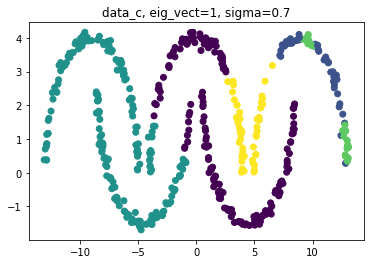

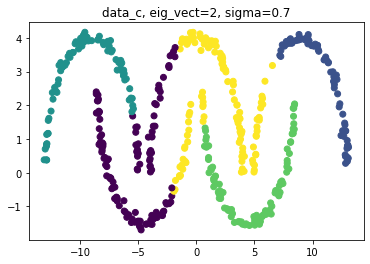

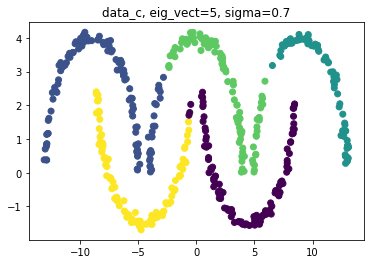

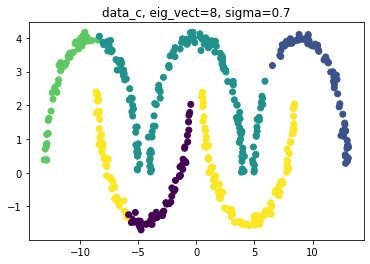

In [58]:
datalst = [data_a,data_b,data_c]
dataname = ["data_a","data_b","data_c"]
sigma = [4.5,0.7,0.7]
for id, data in enumerate(datalst):
  L = L_mat(data, sigma=sigma[id])
  eig_val, eig_vec = np.linalg.eigh(L)
  num_eig = [1, 2, 5, 8]
  for i in num_eig:
    X = np.real(eig_vec[:,1:i+1]).reshape((-1, i))
    clustering = KMeans(n_clusters=5, random_state=0).fit(X)
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    plt.figure()
    plt.title(f"{dataname[id]}, eig_vect={i}, sigma={sigma[id]}" )
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter
    plt.show()

### Quality Compare

Data Set (a): 8 > 5 > 2 > 1

Data Set (b): 5 > 8 = 2 > 1

Data Set (c): 5 = 8 > 2 > 1

## b) SpectralClustering

In [59]:
from sklearn.cluster import SpectralClustering


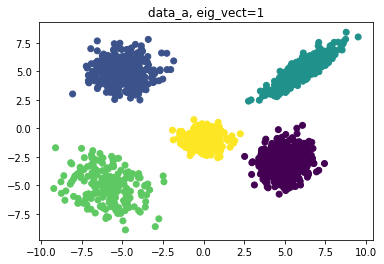

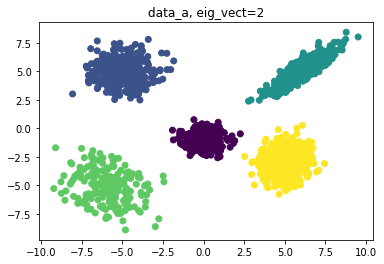

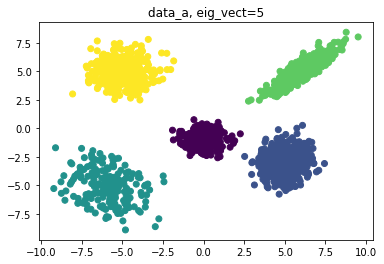

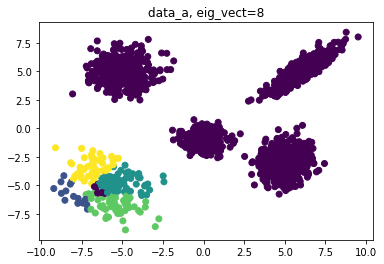

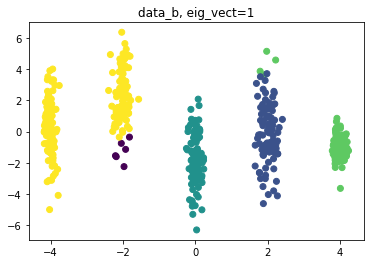

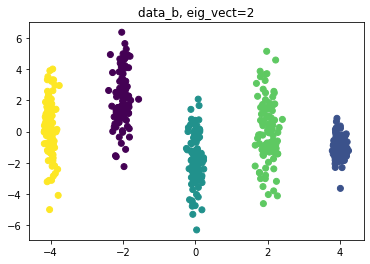

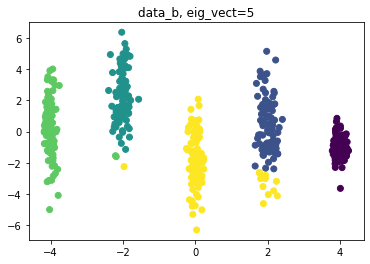

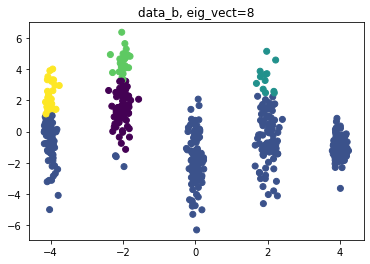

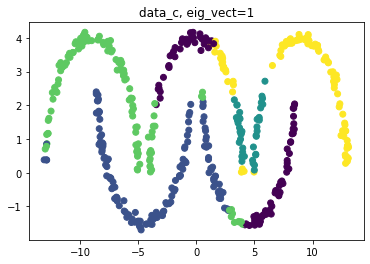

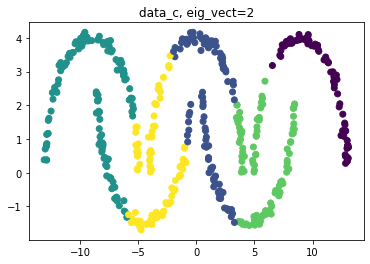

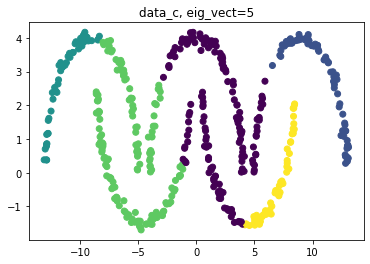

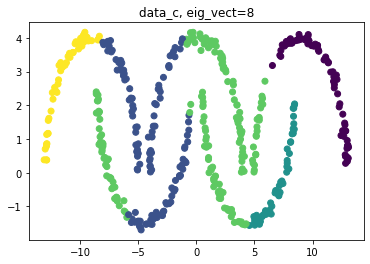

In [65]:
datalst = [data_a,data_b,data_c]
dataname = ["data_a","data_b","data_c"]
# sigma = [4.5,0.7,0.7]
num_eig = [1, 2, 5, 8]
for id, data in enumerate(datalst):
  for i in num_eig:
    clustering = SpectralClustering(n_clusters=5, n_components=i).fit(data)
    labels = clustering.labels_
    plt.figure()
    plt.title(f"{dataname[id]}, eig_vect={i}" )
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.show()

### Quality Compare

Data Set (a): 5 = 2 > 1 > 8

Data Set (b): 2 > 5 > 8 = 1

Data Set (c): 5 > 2 = 1 > 8 

### c) KMeans

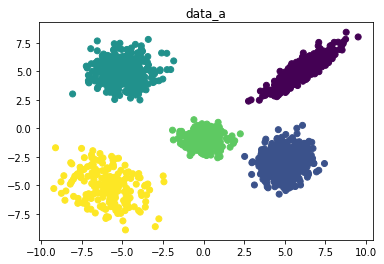

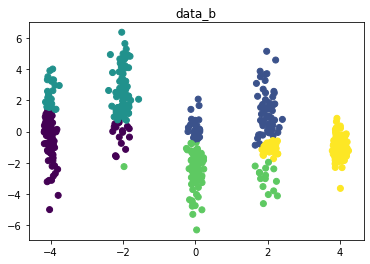

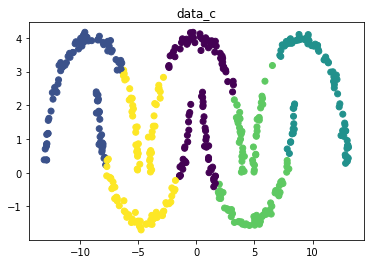

In [62]:
datalst = [data_a,data_b,data_c]
dataname = ["data_a","data_b","data_c"]
# sigma = [4.5,0.7,0.7]
# num_eig = [1, 2, 5, 8]
for id, data in enumerate(datalst):
  # for i in num_eig:
  clustering = KMeans(n_clusters=5, random_state=0).fit(data)
  labels = clustering.labels_
  plt.figure()
  plt.title(f"{dataname[id]}" )
  plt.scatter(data[:, 0], data[:, 1], c=labels)
  plt.show()

### d) AgglomerativeClustering

In [67]:
from sklearn.cluster import AgglomerativeClustering


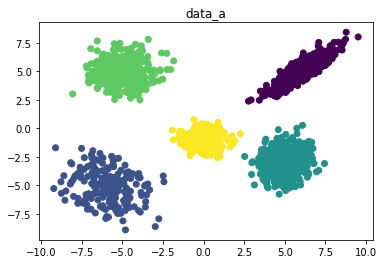

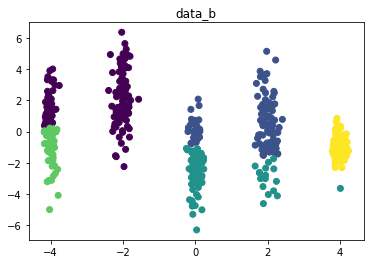

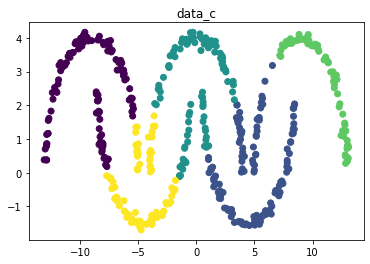

In [68]:
datalst = [data_a,data_b,data_c]
dataname = ["data_a","data_b","data_c"]
# sigma = [4.5,0.7,0.7]
# num_eig = [1, 2, 5, 8]
for id, data in enumerate(datalst):
  # for i in num_eig:
  clustering = AgglomerativeClustering(n_clusters=5).fit(data)
  labels = clustering.labels_
  plt.figure()
  plt.title(f"{dataname[id]}" )
  plt.scatter(data[:, 0], data[:, 1], c=labels)
  plt.show()

### e) Mean-Shift

In [73]:
# from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth


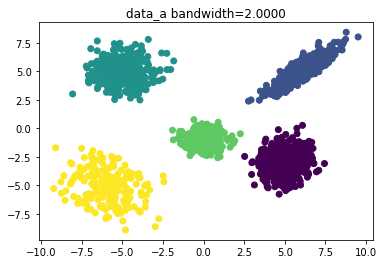

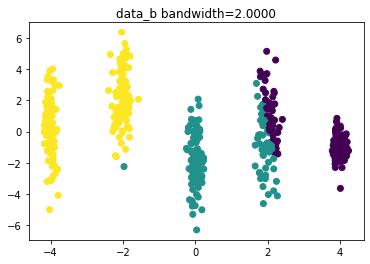

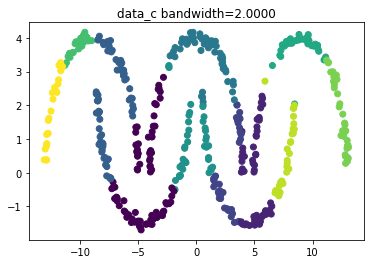

In [81]:
datalst = [data_a,data_b,data_c]
dataname = ["data_a","data_b","data_c"]
# sigma = [4.5,0.7,0.7]
# num_eig = [1, 2, 5, 8]
bandwidth = 2
for id, data in enumerate(datalst):
  # for i in num_eig:
  # bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
  
  clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(data)
  labels = clustering.labels_
  plt.figure()
  plt.title(f"{dataname[id]} bandwidth={bandwidth:.4f}" )
  plt.scatter(data[:, 0], data[:, 1], c=labels)
  plt.show()

Given the bandwidth = 2, we could notice that it cannot bring good performance for b and c, a bandwidth of 2 will easy cover across clusters.

### f)

1.)


Data Set A: KMeans = Spectral (eigenvectors = [1,2,5] )= Agglomerative = Mean-Shift.


Data Set B: Spectral (eigenvectors = [2]) > Agglomerative  > Mean-Shift >  KMeans 


Data Set C: Spectral (eigenvectors = [5]) > Mean-Shift > Agglomerative > Kmeans 


Then ranking above shows that no method consistently better than the others; however, spectral could be the optimal since it wins the most. 


In data set A, the data can be easily clustered using all methods above, since the data given is simple and has significant different distributions. In Spectral Clustering however, I using more eigen vector cannot guagrantee better performance. Mean shift did a good job in a and c, however it cannot give correct cluster in b.


2.)


If labels were provided, I think SVM will do a better job. One major reason is that SVM could use the kernel method and it could do better job in these non-linear-sperable situation, it can use "rbf" kernel to do the classification. 

In [83]:
! jupyter nbconvert --to markdown hw8.ipynb

[NbConvertApp] Converting notebook hw8.ipynb to markdown
[NbConvertApp] Support files will be in hw8_files/
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvertApp] Making directory hw8_files
[NbConvert